In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [6]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [7]:
df['Region']=df['Region'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


In [9]:
df=df.dropna().reset_index(drop=True)

In [10]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [11]:
df=df.drop(122).reset_index(drop=True)

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [15]:
df.columns=df.columns.str.strip()

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df[['day', 'month', 'year', 'Temperature', 'RH','Ws']]=df[['day', 'month', 'year', 'Temperature', 'RH','Ws']].astype(int)

In [18]:
objects=[features for features in df.columns if df[features].dtype=='O']

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [20]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [23]:
df.to_csv('algerian_fire.csv')

### EDA

In [24]:
df_copy=df

In [25]:
df_copy.drop(columns=["day","month","year"],inplace=True)

In [26]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [27]:
df_copy["Classes"]=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [28]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<Axes: >

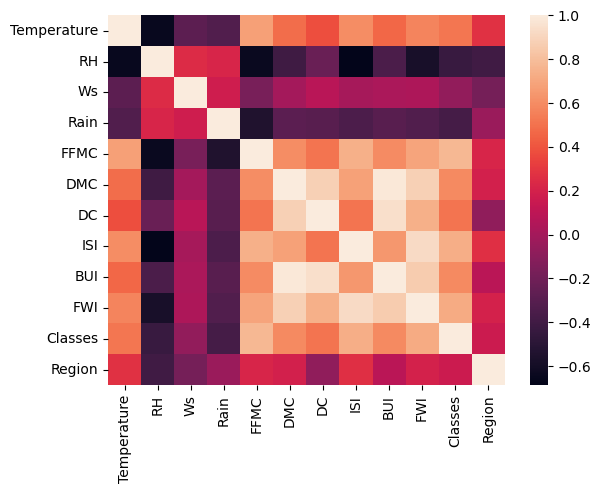

In [29]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

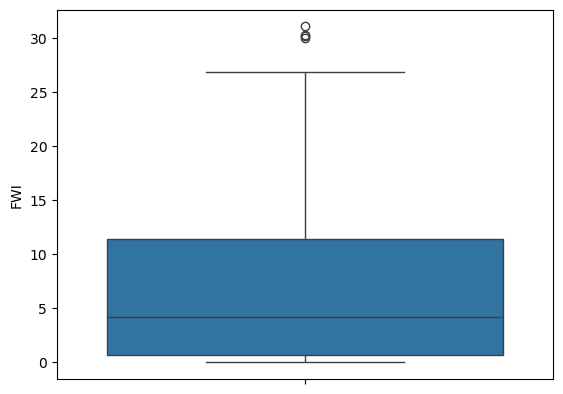

In [30]:
sns.boxplot(df_copy['FWI'])

In [31]:
X=df.drop('FWI',axis=1)

In [32]:
y=df['FWI']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
X_train.shape

(182, 11)

<Figure size 4000x4000 with 0 Axes>

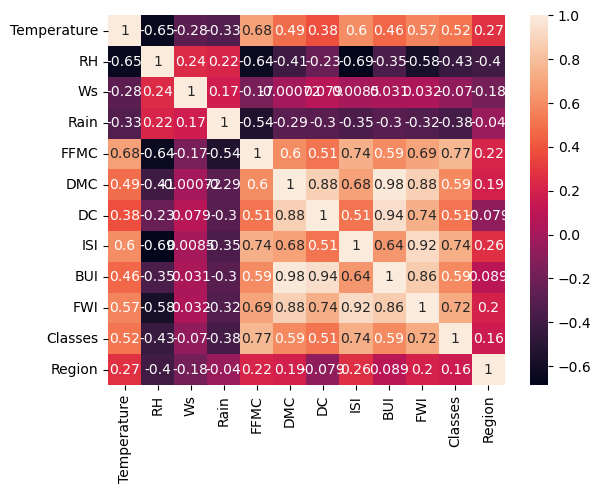

In [36]:
sns.heatmap(df_copy.corr(),annot=True)
plt.Figure(figsize=(40,40))

In [37]:
def corelation(dataset,threshold):
    col_corr=set()
    col_matirx=dataset.corr()
    for i in range(len(col_matirx.columns)):
        for j in range(i):
            if abs(col_matirx.iloc[i,j])>threshold:
                colname=col_matirx.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
sk=corelation(X_train,0.85)

In [39]:
X_train=X_train.drop(sk,axis=1)
X_test=X_test.drop(sk,axis=1)

In [40]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [41]:
# Normalization
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [43]:
X_train=scaler.fit_transform(X_train)

In [44]:
X_test=scaler.transform(X_test)

#### Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
linerg=LinearRegression()

In [47]:
linerg.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred=linerg.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [50]:
r2_score(y_test,y_pred)

0.9847657384266951

In [51]:
mean_absolute_error(y_test,y_pred=y_pred)

0.5468236465249976

In [52]:
mean_squared_error(y_true=y_test,y_pred=y_pred)

0.6742766873791581

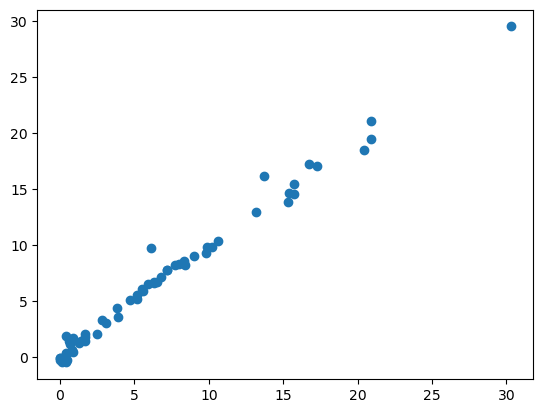

In [53]:
plt.scatter(y_test,y_pred)

#### Lasso

1.1331759949144085
2.2483458918974746
0.9492020263112388


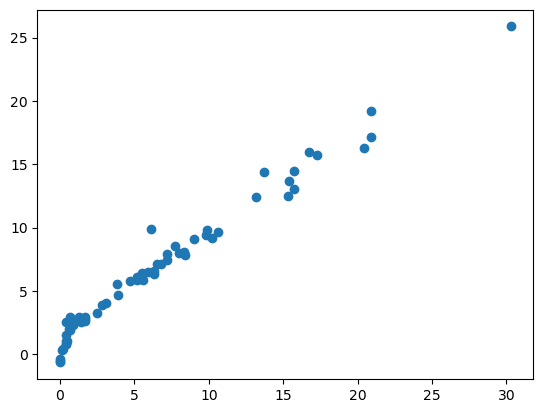

In [54]:
from sklearn.linear_model import Lasso
lassoreg=Lasso()
lassoreg.fit(X_train,y_train)
y_pred=lassoreg.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

#### Lasso CV

0.6199701158263431
0.7924995554743622
0.9820946715928275


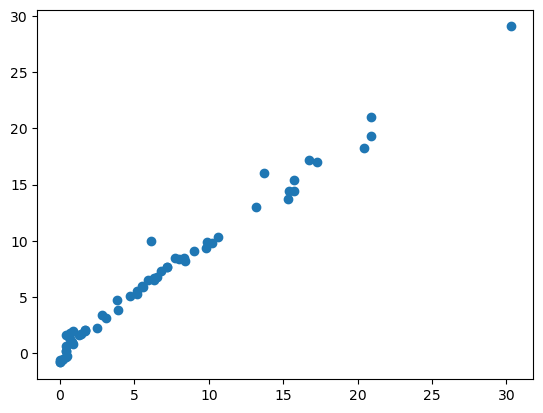

In [55]:
from sklearn.linear_model import LassoCV
lassoreg=LassoCV(cv=5)
lassoreg.fit(X_train,y_train)
y_pred=lassoreg.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

#### Ridge

1.1331759949144085
2.2483458918974746
0.9492020263112388


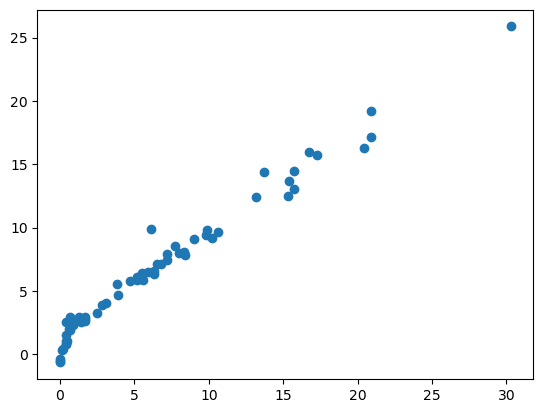

In [56]:
from sklearn.linear_model import Ridge
ridge1=Lasso()
ridge1.fit(X_train,y_train)
y_pred=ridge1.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

#### Ridge CV

0.5642305340105693
0.6949198918152067
0.9842993364555513


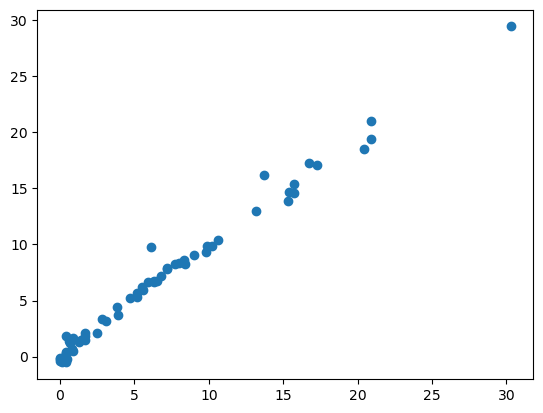

In [57]:
from sklearn.linear_model import RidgeCV
rdige=RidgeCV(cv=5)
rdige.fit(X_train,y_train)
y_pred=rdige.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

#### Elastic Net

1.8822353634896
5.517251101025224
0.8753460589519703


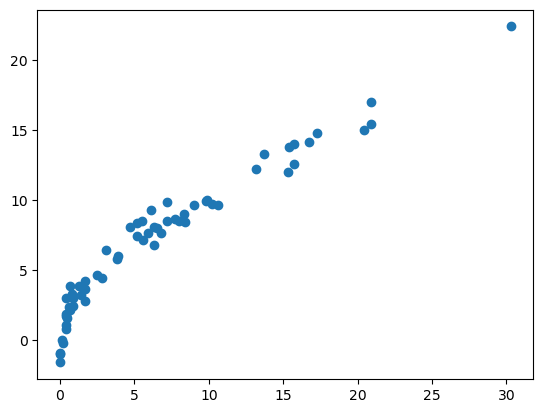

In [58]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

#### Elastic Net CV

0.6575946731430904
0.8222830416276272
0.9814217587854941


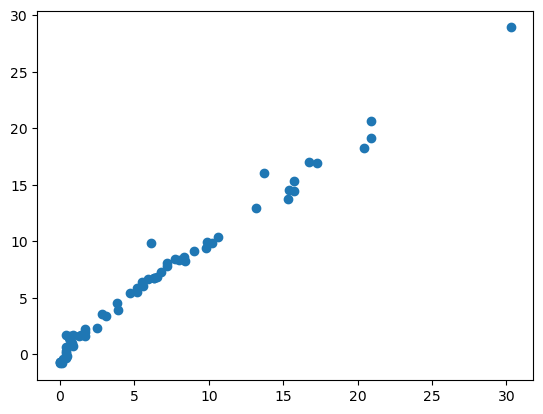

In [59]:
from sklearn.linear_model import ElasticNetCV
elastic=ElasticNetCV(cv=5)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
print(mean_absolute_error(y_test,y_pred=y_pred))
print(mean_squared_error(y_true=y_test,y_pred=y_pred))
print(r2_score(y_test,y_pred))
plt.scatter(y_test,y_pred)

In [60]:
elastic.alpha_

0.04311146156383891

In [61]:
import pickle

In [63]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(rdige,open('ridge.pkl','wb'))